In [3]:
%matplotlib inline

import os
import sys

preprocess_path = os.path.abspath(os.path.join('..'))
# print(preprocess_path)
if preprocess_path not in sys.path:
    sys.path.append(preprocess_path)
# sys.path

In [4]:
from preprocess.frequencies import termsFrequency, termPerCompound
from preprocess.load_data import loadDataset
from preprocess.compute_memberships import membershipMatrix
import matplotlib.pyplot as plt

DATA_LOC = '../data/'
filepath = os.path.join(DATA_LOC, 'dataset.tab')

# Loading the dataset
cids, smiles, names, formulas, terms, treeids, tset = loadDataset(filepath)

Just to visualize some examples in the dataset (only the interesting features):

In [5]:
for i in range(5):
    print(cids[i], smiles[i], '...', terms[i])

5280427 CCCCCC(C=CC1C(CC2C1CC(=CCCCC(=O)O)O2)O)O ... ['Platelet Aggregation Inhibitors', 'Antihypertensive Agents']
73417083 CCOC(=O)C1=C(NC(=C(C1C2=C(C(=CC=C2)Cl)Cl)C(=O)OC)C)C.CCOC(=O)C1=C(NC(=C(C1C2=C(C(=CC=C2)Cl)Cl)C(=O)OC)C)C ... ['Vasodilator Agents', 'Calcium Channel Blockers', 'Antihypertensive Agents', 'Anti-Arrhythmia Agents']
10031812 CCC(COC(=O)C1=CC(=C(C(=C1)OC)OC)OC)N(C)CCN(C)C(CC)COC(=O)C2=CC(=C(C(=C2)OC)OC)OC ... ['Anti-Arrhythmia Agents']
3081544 CNC1C(C2C(CC(C(O2)OC3C(CC(C(C3O)O)N)N)N)OC1OC4C(C(C(C(O4)CO)N)O)O)O.OS(=O)(=O)O ... ['Anti-Bacterial Agents']
439520 CC(CCC(=O)O)C1CCC2C1(C(CC3C2C(CC4C3(CCC(C4)O)C)O)O)C ... ['Gastrointestinal Agents']


The data set was preprocessed in order to keep only one of all the duplicated compounds (i.e. those with the same SMILES) and discarding the terms with absolute frequency <20 (if a compound was associated with only 1 term or with all terms with frequency <20, than it was excluded, otherwise only the term was excluded from the term list associated with the compound).

From initial ~15'000 compounds and 489 terms, now they are: 

In [6]:
print(len(cids), len(tset))

10336 213


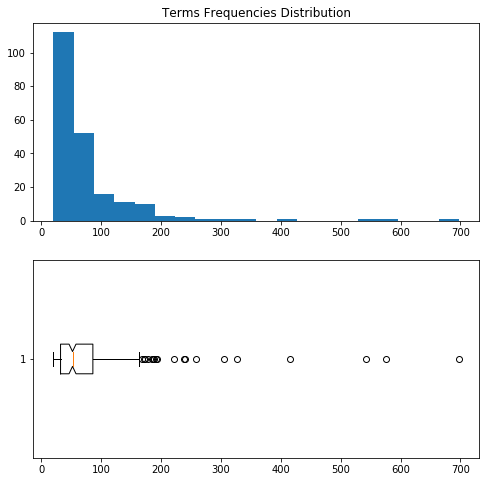

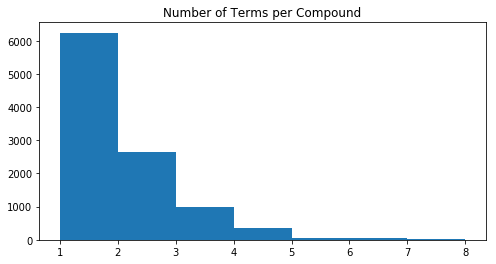

In [7]:
# "memberships" matrix: each row represents a term, the i-th is 1/0 if the i-th compound is/isn't associated with
# the term
m, term_labels = membershipMatrix(tset, terms)

# absolute frequency for each term (i.e. how many times the term is present in the dataset)
frequency = termsFrequency(m)
# number of terms associated with each compound
terms_per_cp = termPerCompound(m)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.hist(frequency, bins=20)
plt.title("Terms Frequencies Distribution")
plt.subplot(2,1,2)
plt.boxplot(frequency, notch=True, vert=False)
plt.figure(figsize=(8, 4))
plt.hist(terms_per_cp, bins=7)
plt.title("Number of Terms per Compound")
plt.show()

From the second histogram it's clear that many compounds are associated with more than one MeSH term. In order to decide how to deal with it, it could be interested to find out how many different "groups" of terms are present:

In [8]:
term_groups = []

for t_list in terms:  # terms is a list containing the lists of terms associated to each compound
    if t_list not in term_groups:
        term_groups.append(t_list)

print(len(term_groups))

1556


That is a high number, so it would be better using only the 213 terms as classes

In order to build our fingerprint mapper using as input just the SMILES representation of the molecules, it's interesting to find out how many different symbols are present in the SMILES strings (size of the vocabulary).

In [9]:
import numpy as np

charset = set()
lengths = np.zeros((len(smiles), 1), dtype=int)
for i in range(len(smiles)):
    lengths[i] = len(smiles[i])
    smiles_set = set(list(smiles[i]))
    charset.update(smiles_set)

charset = list(charset)
charset.sort()
print('V = ', charset)
print('|V| = ', len(charset))

V =  ['#', '(', ')', '+', '-', '.', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'y']
|V| =  56


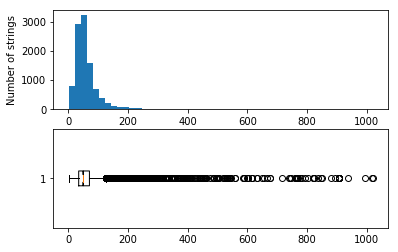

Min - Max - Average - Median SMILES length:  1 1021 64.6667956656 50.0
Number of SMILES len > 200:  272
Number of SMILES len > 400:  102
Number of SMILES len > 600:  46
Number of SMILES len < 20:  611
Number of SMILES len < 10:  110


In [27]:
%matplotlib inline

plt.subplot(2,1,1)
plt.hist(lengths, bins=50)
plt.xlabel('Length of SMILES')
plt.ylabel('Number of strings')

plt.subplot(2,1,2)
plt.boxplot(lengths, notch=True, vert=False)
plt.show()

print('Min - Max - Average - Median SMILES length: ',lengths.min(), lengths.max(), lengths.mean(), np.median(lengths))
print('Number of SMILES with len > 200: ', len(np.where(lengths>200)[0]))
print('Number of SMILES with len > 400: ', len(np.where(lengths>400)[0]))
print('Number of SMILES with len > 600: ', len(np.where(lengths>600)[0]))
print('Number of SMILES with len < 20: ', len(np.where(lengths<20)[0]))
print('Number of SMILES with len < 10: ', len(np.where(lengths<10)[0]))